In [216]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("products_ingredients_07-10-2019.csv")  

In [217]:
data.head()

,product_id,ingredient_id,product_name,ingredient_name
0,1,1,5-Block Power Breakfast,Egg
1,1,2,5-Block Power Breakfast,Ground Chicken
2,1,3,5-Block Power Breakfast,Sweet Potato
3,1,4,5-Block Power Breakfast,Onion
4,1,5,5-Block Power Breakfast,Red Pepper


In [218]:
data.tail()

,product_id,ingredient_id,product_name,ingredient_name
18806,7510,696,Turkey Burger with Pesto Cauliflower and Olive...,Kosher Salt
18807,7510,1056,Turkey Burger with Pesto Cauliflower and Olive...,Dried Oregano Leaves
18808,7510,1071,Turkey Burger with Pesto Cauliflower and Olive...,Citrus Extracts
18809,7510,1072,Turkey Burger with Pesto Cauliflower and Olive...,Pomegranate Extract
18810,7510,1073,Turkey Burger with Pesto Cauliflower and Olive...,Rosemary Extract


In [219]:
ingredient_names=data['ingredient_name'].unique()
ingredient_names

array(['Egg', 'Ground Chicken', 'Sweet Potato', ...,
       'Unsweetened Shredded Coconut', 'Canned Crushed Tomatoes',
       'Dried Apricots'], dtype=object)

In [220]:
products=data.groupby(['product_id', 'product_name'])['product_name'].count()
products

product_id  product_name                                                                   
1           5-Block Power Breakfast                                                            12
2           Chicken & Mash (Zone)                                                              21
3           Bacon and Eggs                                                                     11
4           Very Veggie Omelet                                                                 13
5           Steak N' Eggs (Old)                                                                11
6           Joe's Special                                                                       9
7           Eggless Beef and Sweet Potato Breakfast                                             9
8           Mega Muffins with Apple                                                            13
9           Seasonal Fruit Salad                                                               10
10          Mint Pesto Shr

In [251]:
product_names=products.index.get_level_values('product_name')
product_names.values

array(['5-Block Power Breakfast', 'Chicken & Mash (Zone)',
       'Bacon and Eggs', ...,
       'Turkey Burger with Pesto Cauliflower and Olive Tapenade',
       'Athlete Olive Tapenade Turkey Burger with Butternut Squash and Rice',
       'Turkey Burger with Pesto Cauliflower and Olive Tapenade ( Keto-Friendly)'],
      dtype=object)

In [278]:
product_ids=products.index.get_level_values('product_id')
product_ids.values

array([   1,    2,    3, ..., 7508, 7509, 7510])

In [279]:
len(product_ids)

1128

In [222]:
product_ingredients=data.groupby(['product_id','ingredient_id'])['ingredient_id'].count().unstack(1, fill_value=0.0)

In [223]:
x=product_ingredients.values

In [224]:
x

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [225]:
len(x)

1128

In [226]:
x.shape

(1128, 1064)

In [270]:
# 1. Elegimos la clase de modelo
from sklearn.mixture import GaussianMixture

# 2. Instanciamos el modelo con sus hiperparámetros
model = GaussianMixture(n_components=20,
            covariance_type='full', random_state=5)  

# 3. Ajustamos a los datos. Notar que "y" no es especificada
model.fit(x)                    

# 4. Determinamos las etiquetas de los clusters
meals_predicted = model.predict(x)  

In [271]:
meals_predicted.shape

(1128,)

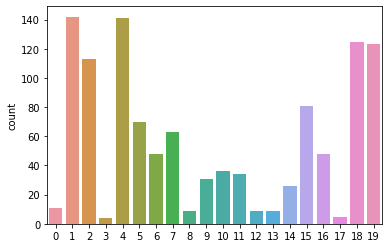

In [272]:
sns.countplot(meals_predicted) 

In [273]:
len(meals_predicted)

1128

In [282]:
product_classes=pd.DataFrame({'class': meals_predicted,
                       'product': product_names.values,
                        'product_id': product_ids})

In [283]:
product_classes.sort_values('class')

,class,product,product_id
825,0,Athlete Korean-Style Beef with White Rice and ...,7028
976,0,Athlete Matcha Pancakes and Egg White Scramble,7240
975,0,Matcha Pancake and Egg White Scramble,7239
868,0,Athlete Sesame Chicken & Rice Noodle Salad wit...,7096
867,0,Sesame Chicken and Sichuan Green Beans with Bo...,7095
866,0,Athlete Grilled Chicken and Spirulina Rice wit...,7094
865,0,Grilled Chicken and Spirulina Parsnip Rice wit...,7093
592,0,Poached Salmon with Almond Gremolata,631
593,0,Athlete Poached Salmon with Quinoa,632
824,0,Korean-Style Beef with Sesame Spaghetti Squash...,7027


In [284]:
product_classes[product_classes['class']==0]

,class,product,product_id
592,0,Poached Salmon with Almond Gremolata,631
593,0,Athlete Poached Salmon with Quinoa,632
757,0,Bamboo Rice Bibimbap,6019
824,0,Korean-Style Beef with Sesame Spaghetti Squash...,7027
825,0,Athlete Korean-Style Beef with White Rice and ...,7028
865,0,Grilled Chicken and Spirulina Parsnip Rice wit...,7093
866,0,Athlete Grilled Chicken and Spirulina Rice wit...,7094
867,0,Sesame Chicken and Sichuan Green Beans with Bo...,7095
868,0,Athlete Sesame Chicken & Rice Noodle Salad wit...,7096
975,0,Matcha Pancake and Egg White Scramble,7239


In [13]:


x['cluster']=meals_predicted

print(x)

ingredient_id    1    2    3    4    5    6    7    8    9   10  ...  1110  \
product_id                                                       ...         
1              1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   0.0   
2              0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  ...   0.0   
3              1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  ...   0.0   
4              1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  ...   0.0   
5              1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  ...   0.0   
6              1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  ...   0.0   
7              0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  ...   0.0   
8              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   0.0   
9              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
10             0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  ...   0.0   
11             0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0 

In [14]:
# 1. Seleccionar la clase de modelo
from sklearn.decomposition import PCA  

# 2. Instanciar el modelo con hiperparámetros
model = PCA(n_components=2)            

# 3. Ajustar a los datos. Notar que no especificamos "y" 
model.fit(x)                      

# 4. Transformar los datos a dos dimensiones
X_2D = model.transform(x)   

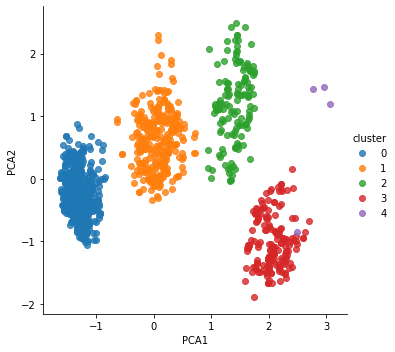

In [15]:
x['PCA1'] = X_2D[:, 0]
x['PCA2'] = X_2D[:, 1]

sns.lmplot("PCA1", "PCA2", hue='cluster', data=x, fit_reg=False);

<Figure size 1080x1080 with 0 Axes>

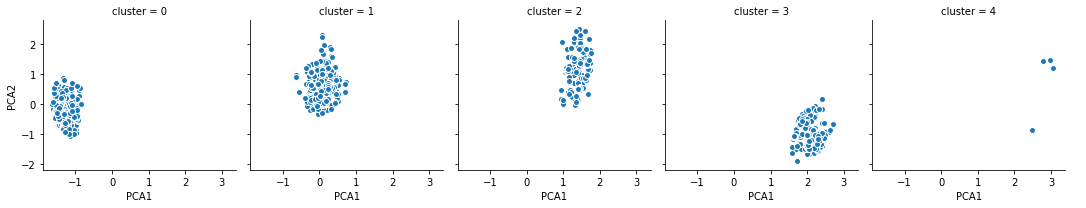

In [16]:
plt.figure(figsize=(15,15))
g = sns.FacetGrid(x, col="cluster", col_wrap=5, height=3)
g = (g.map(plt.scatter, "PCA1", "PCA2", edgecolor="w").add_legend())